## AISHWARYA PANDEY

## DATA SCIENCE AND BUSINESS ANALYTICS INTERN @ tHE SPARKS FOUNDATION

## #GRIPJUNE21 #TSF 

# Exploratory Data Analysis - Retail

In [4]:
import pandas as pd
import numpy as np

In [5]:
url= "SampleSuperstore.csv"

In [6]:
df=pd.read_csv(url)

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [10]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


there is a difference between mean and median(50%tile) value of 'Sales' and 'Profit'


also there is a difference between max and 75%tile values of 'Sales','Quantity' and 'Profit'


It means some outliers are Present.

#### Lets explore our target value

In [11]:
df.Profit.unique()

array([ 41.9136, 219.582 ,   6.8714, ...,  16.124 ,   4.1028,  72.948 ])

In [12]:
df.Profit.value_counts()

0.0000     65
6.2208     43
9.3312     38
5.4432     32
3.6288     32
           ..
23.5764     1
14.2020     1
10.9602     1
29.7024     1
16.9975     1
Name: Profit, Length: 7287, dtype: int64

In [13]:
# There is no unique value

#### Check for null values

In [14]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#Thus No null values are present in our dataset

# Exploratory Data Analysis

#### Looking for Correlations

In [15]:
corr_matrix = df.corr()

In [16]:
corr_matrix['Profit'].sort_values(ascending=False)

Profit         1.000000
Sales          0.479064
Quantity       0.066253
Postal Code   -0.029961
Discount      -0.219487
Name: Profit, dtype: float64

#Sales has positive correlation 'Postal Code' and 'Discount' has high negative correlation

#### To check Correlation using HeatMap

<AxesSubplot:>

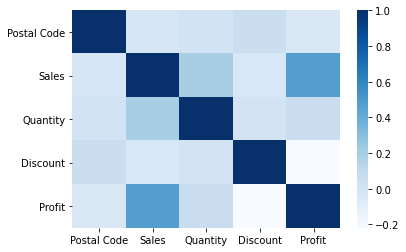

In [17]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=False)

#Profit has strong positive correlation with 'Sales'

#Profit has srong negative correlation with 'Discount'

#Profit has almost no correlation with'Quantity' and 'PostalCode'

#Thus we can drop 'Quantity' and 'PostalCode'

In [18]:
# by setting annot=True you will get values by ehich variables are correlated to each other in grid-cells

In [19]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

#### CountPlot of Ship Mode Column

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

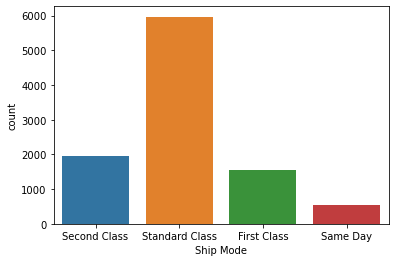

In [20]:
sns.countplot(df['Ship Mode'])

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

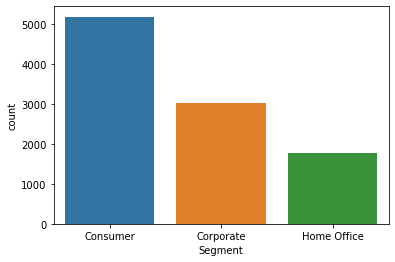

In [21]:
sns.countplot(df['Segment'])
df['Segment'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

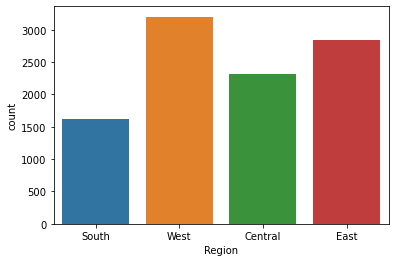

In [22]:
sns.countplot(df['Region'])
df['Region'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

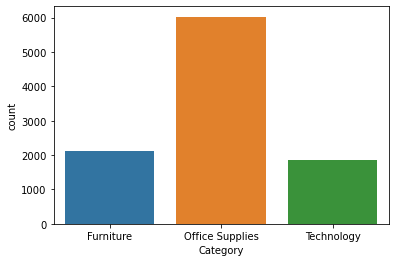

In [23]:
sns.countplot(df['Category'])
df['Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

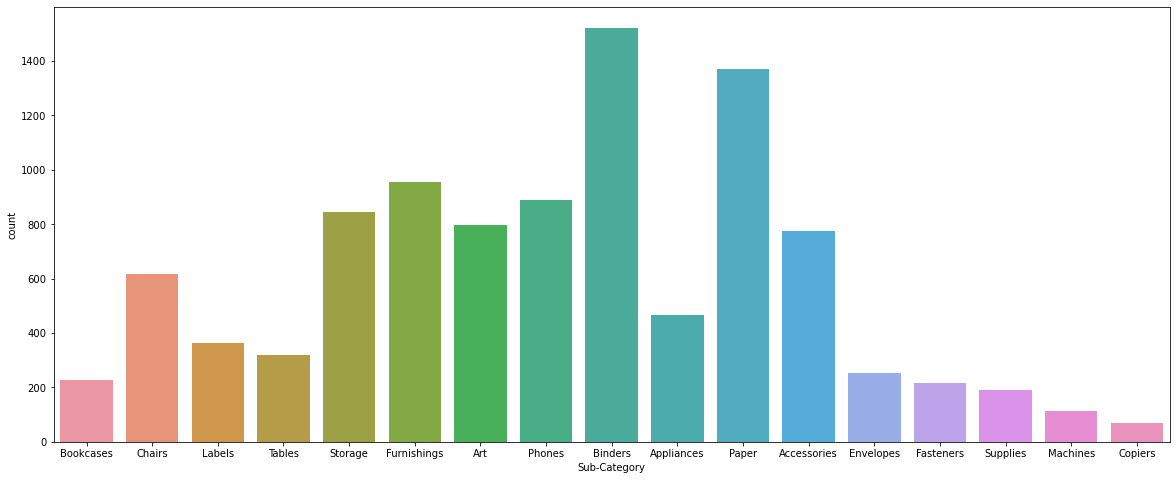

In [24]:
plt.figure(figsize=(20,8))
sns.countplot(df['Sub-Category'])
df['Sub-Category'].value_counts()

3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64

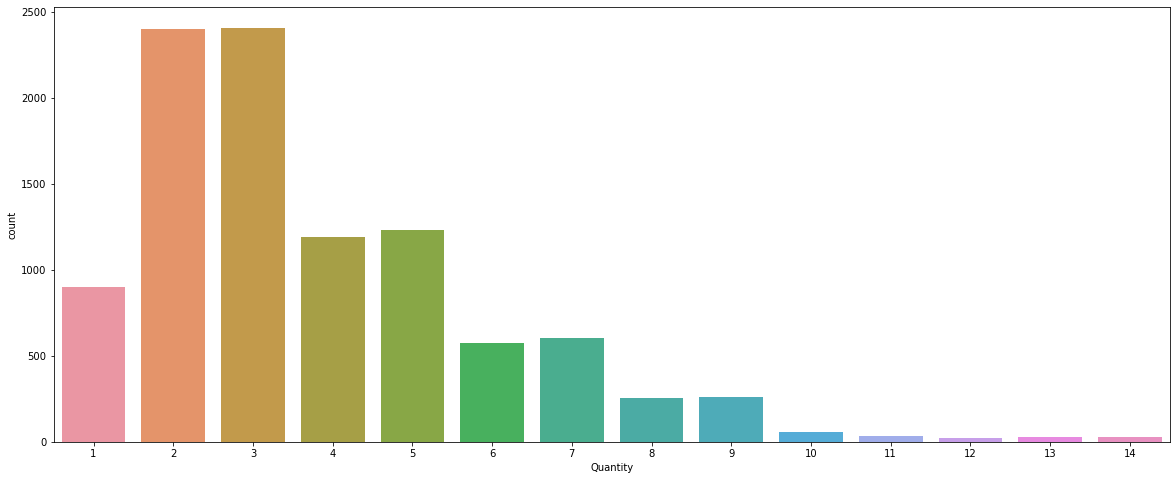

In [25]:
plt.figure(figsize=(20,8))
sns.countplot(df['Quantity'])
df['Quantity'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

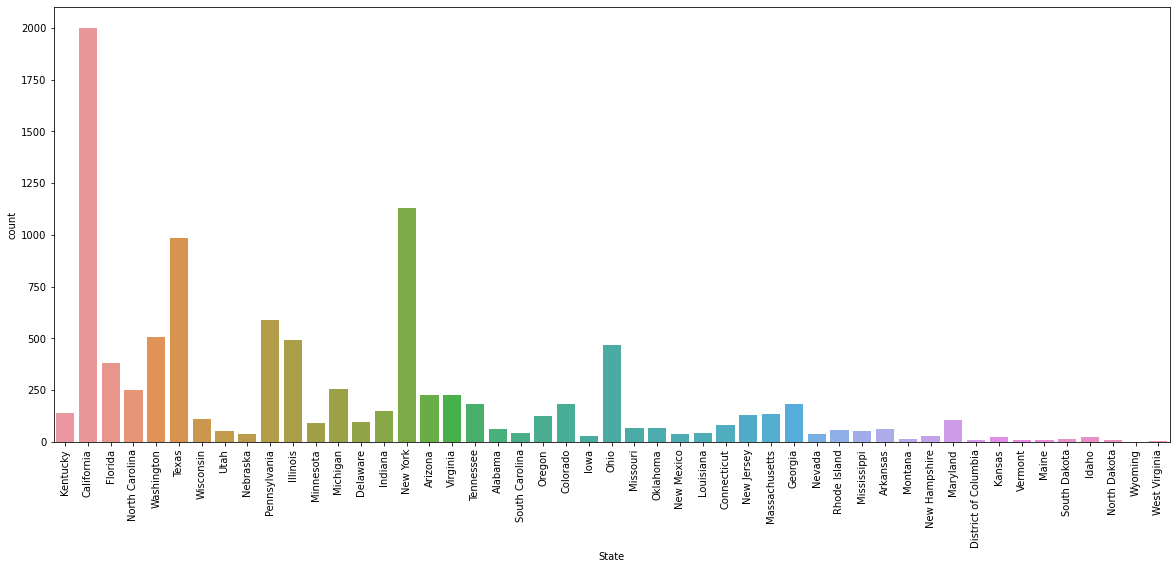

In [26]:
plt.figure(figsize=(20,8))
sns.countplot(df['State'])
plt.xticks(rotation=90)
df['State'].value_counts()

#Top 3 states where Sale in High

#1.California

#2.NewYork

#3.Texas

In [27]:
df['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Cheyenne           1
Goldsboro          1
Holyoke            1
Conroe             1
Jupiter            1
Name: City, Length: 531, dtype: int64

In [28]:
df_ct=df['City'].value_counts()
df_ct=df_ct.head(50)

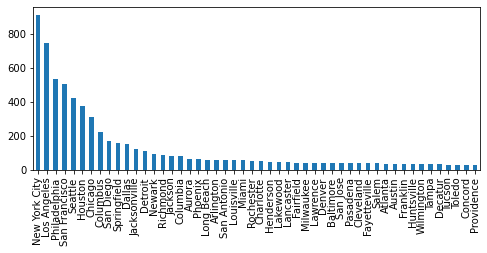

In [29]:
df_ct.plot(kind='bar',figsize=(8,3))
plt.show()

#city with top sales
1.NewYork
2.Los Angles
3.Philadelphia

0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64

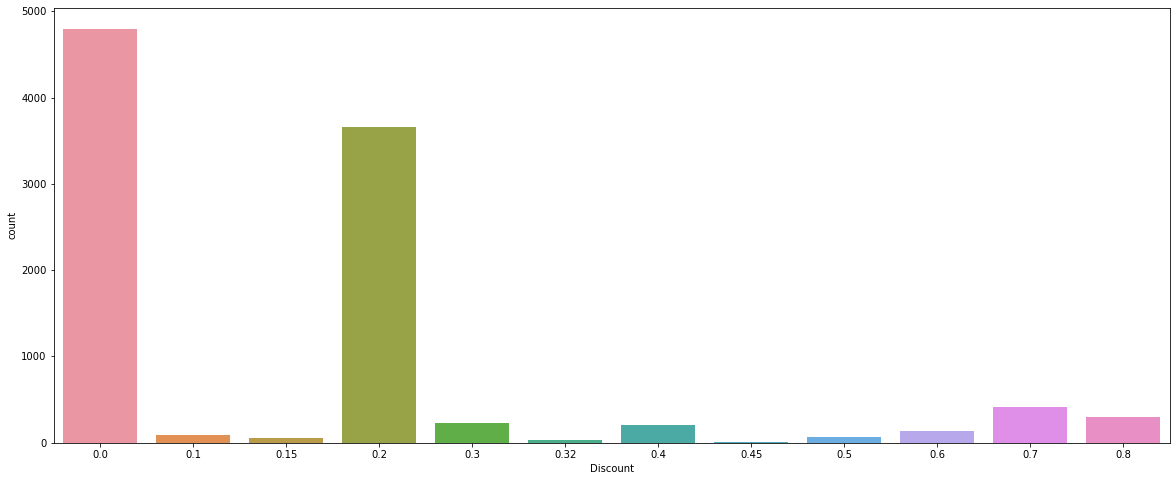

In [30]:
plt.figure(figsize=(20,8))
sns.countplot(df['Discount'])
df['Discount'].value_counts()

### Check Distribution Skewness

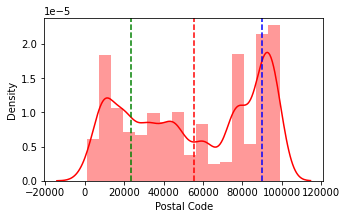

In [31]:
fig=plt.subplots(figsize=(5,3))
sns.distplot(df['Postal Code'],color='red')
plt.axvline(x=np.mean(df['Postal Code']),c='red',ls='--',label='mean')
plt.axvline(x=np.percentile(df['Postal Code'],25),c='green',ls='--',label='25th percentile:Q1')
plt.axvline(x=np.percentile(df['Postal Code'],75),c='blue',ls='--',label='75th percentile:Q3')
plt.show()

In [32]:
#there is no skewness

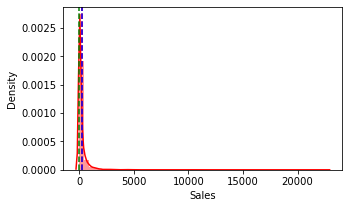

In [33]:
fig=plt.subplots(figsize=(5,3))
sns.distplot(df['Sales'],color='red')
plt.axvline(x=np.mean(df['Sales']),c='red',ls='--',label='mean')
plt.axvline(x=np.percentile(df['Sales'],25),c='green',ls='--',label='25th percentile:Q1')
plt.axvline(x=np.percentile(df['Sales'],75),c='blue',ls='--',label='75th percentile:Q3')
plt.show()

In [34]:
# the above independent variable is positively/right skewed

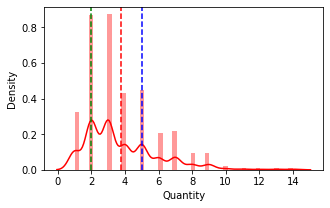

In [35]:
fig=plt.subplots(figsize=(5,3))
sns.distplot(df['Quantity'],color='red')
plt.axvline(x=np.mean(df['Quantity']),c='red',ls='--',label='mean')
plt.axvline(x=np.percentile(df['Quantity'],25),c='green',ls='--',label='25th percentile:Q1')
plt.axvline(x=np.percentile(df['Quantity'],75),c='blue',ls='--',label='75th percentile:Q3')
plt.show()

In [36]:
# no skewness

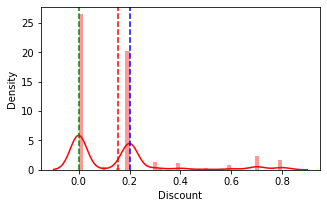

In [37]:
fig=plt.subplots(figsize=(5,3))
sns.distplot(df['Discount'],color='red')
plt.axvline(x=np.mean(df['Discount']),c='red',ls='--',label='mean')
plt.axvline(x=np.percentile(df['Discount'],25),c='green',ls='--',label='25th percentile:Q1')
plt.axvline(x=np.percentile(df['Discount'],75),c='blue',ls='--',label='75th percentile:Q3')
plt.show()

In [38]:
#positively Skewed

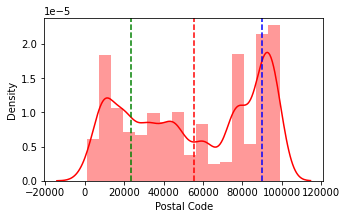

In [39]:
fig=plt.subplots(figsize=(5,3))
sns.distplot(df['Postal Code'],color='red')
plt.axvline(x=np.mean(df['Postal Code']),c='red',ls='--',label='mean')
plt.axvline(x=np.percentile(df['Postal Code'],25),c='green',ls='--',label='25th percentile:Q1')
plt.axvline(x=np.percentile(df['Postal Code'],75),c='blue',ls='--',label='75th percentile:Q3')
plt.show()

In [40]:
#no skewness

### Bar Plot

In [41]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [42]:
#Ship mOde analysis of the Profit

In [43]:
df_ship=df.groupby(['Ship Mode'])[['Profit']].mean()
df_ship= df_ship.sort_values('Profit')
df_ship.head()

,Profit
Ship Mode,
Standard Class,27.494770
Same Day,29.266591
Second Class,29.535545
First Class,31.839948


<AxesSubplot:xlabel='Ship Mode'>

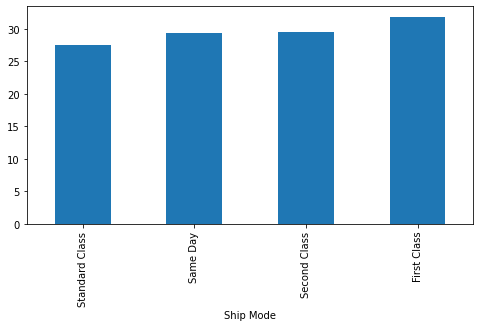

In [44]:
df_ship['Profit'].head(30).plot(kind='bar',figsize=(8,4))

#Profit is high in first class

In [45]:
df_seg=df.groupby(['Segment'])[['Profit']].mean()
df_seg= df_seg.sort_values('Profit')
df_seg.head()

,Profit
Segment,
Consumer,25.836873
Corporate,30.456667
Home Office,33.818664


<AxesSubplot:xlabel='Segment'>

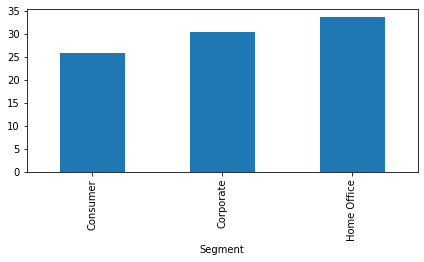

In [46]:
df_seg['Profit'].head(30).plot(kind='bar',figsize=(7,3))

In [47]:
# HomeOffice shows high profit

In [48]:
df_city=df.groupby(['City'])[['Profit']].mean()
df_city= df_city.sort_values('Profit')
df_city.head()

,Profit
City,
Bethlehem,-200.619160
Champaign,-182.352000
Oswego,-178.709200
Round Rock,-169.061614
Lancaster,-157.371052


<AxesSubplot:xlabel='City'>

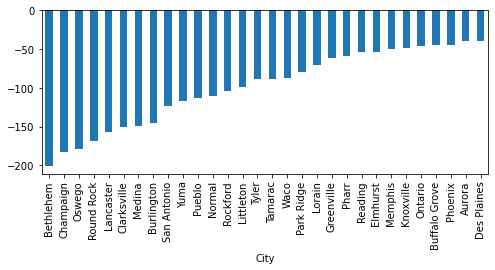

In [49]:
df_city['Profit'].head(30).plot(kind='bar',figsize=(8,3))

In [50]:
# above cities has profit in negative

<AxesSubplot:xlabel='City'>

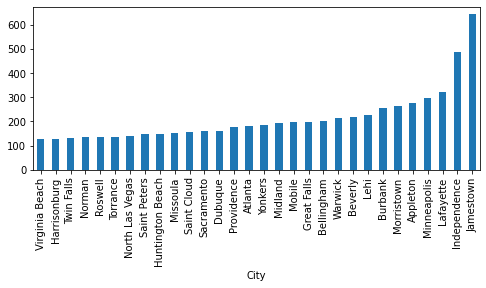

In [51]:
df_city['Profit'].tail(30).plot(kind='bar',figsize=(8,3))

In [52]:
# above cities had profit in positive
#The both  are balanced

In [53]:
df_sta=df.groupby(['State'])[['Profit']].mean()
df_sta= df_sta.sort_values('Profit')
df_sta.head()

,Profit
State,
Ohio,-36.186304
Colorado,-35.867351
North Carolina,-30.083985
Tennessee,-29.189583
Pennsylvania,-26.507598


<AxesSubplot:xlabel='State'>

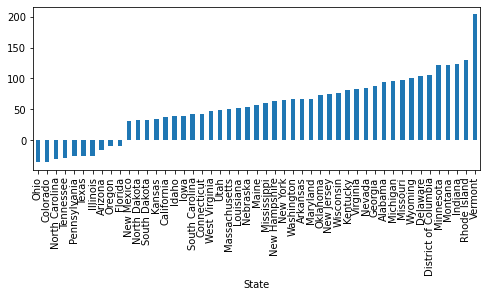

In [54]:
df_sta['Profit'].plot(kind='bar',figsize=(8,3))

#Vermont shows high profit

Ohio shows lowest profit

In [55]:
df_r=df.groupby(['Region'])[['Profit']].mean()
df_r= df_r.sort_values('Profit')
df_r.head()

,Profit
Region,
Central,17.092709
South,28.857673
East,32.135808
West,33.849032


<AxesSubplot:xlabel='Region'>

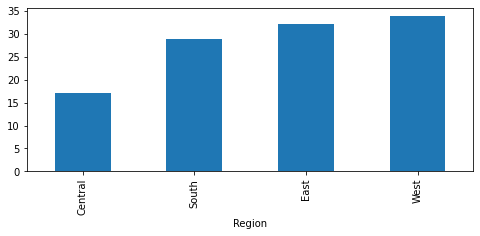

In [56]:
df_r['Profit'].plot(kind='bar',figsize=(8,3))

Profit is high in west Region

In [57]:
df_c=df.groupby(['Category'])[['Profit']].mean()
df_c= df_c.sort_values('Profit')
df_c.head()

,Profit
Category,
Furniture,8.699327
Office Supplies,20.327050
Technology,78.752002


<AxesSubplot:xlabel='Category'>

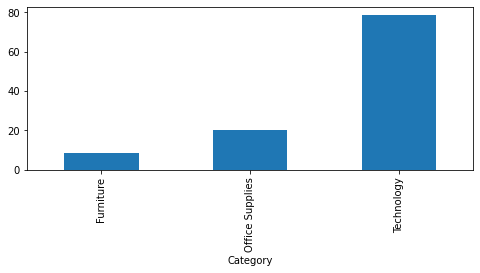

In [58]:
df_c['Profit'].plot(kind='bar',figsize=(8,3))

You got maximum profit in technology

In [59]:
df_sc=df.groupby(['Sub-Category'])[['Profit']].mean()
df_sc= df_sc.sort_values('Profit')
df_sc.head()

,Profit
Sub-Category,
Tables,-55.565771
Bookcases,-15.230509
Supplies,-6.258418
Fasteners,4.375660
Art,8.200737


<AxesSubplot:xlabel='Sub-Category'>

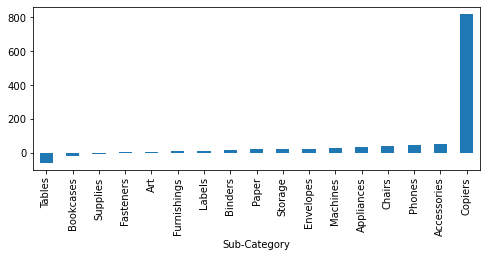

In [60]:
df_sc['Profit'].plot(kind='bar',figsize=(8,3))

Copiers has high profit

In [61]:
df_q=df.groupby(['Quantity'])[['Profit']].mean()
df_q= df_q.sort_values('Profit')
df_q.head(10)

,Profit
Quantity,
1,8.276396
2,16.006831
6,18.051517
3,23.667715
10,35.862404
4,37.131310
5,40.257394
8,42.244342
12,51.524609


<AxesSubplot:xlabel='Quantity'>

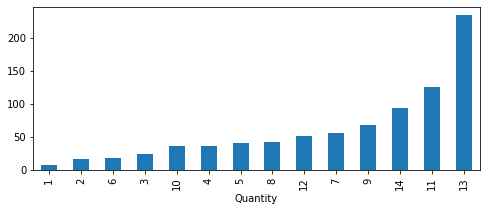

In [62]:
df_q['Profit'].plot(kind='bar',figsize=(8,3))

number 13 is high for profit

In [63]:
df_d=df.groupby(['Discount'])[['Profit']].mean()
df_d= df_d.sort_values('Profit')
df_d.head()

,Profit
Discount,
0.50,-310.703456
0.45,-226.646464
0.40,-111.927429
0.80,-101.796797
0.70,-95.874060


<AxesSubplot:xlabel='Discount'>

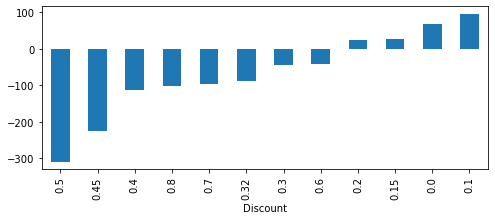

In [64]:
df_d['Profit'].plot(kind='bar',figsize=(8,3))

In [65]:
# Discount and Profit are negatively correlated

## Plotting Histograms

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'Postal Code'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Discount'}>],
       [<AxesSubplot:title={'center':'Profit'}>, <AxesSubplot:>]],
      dtype=object)

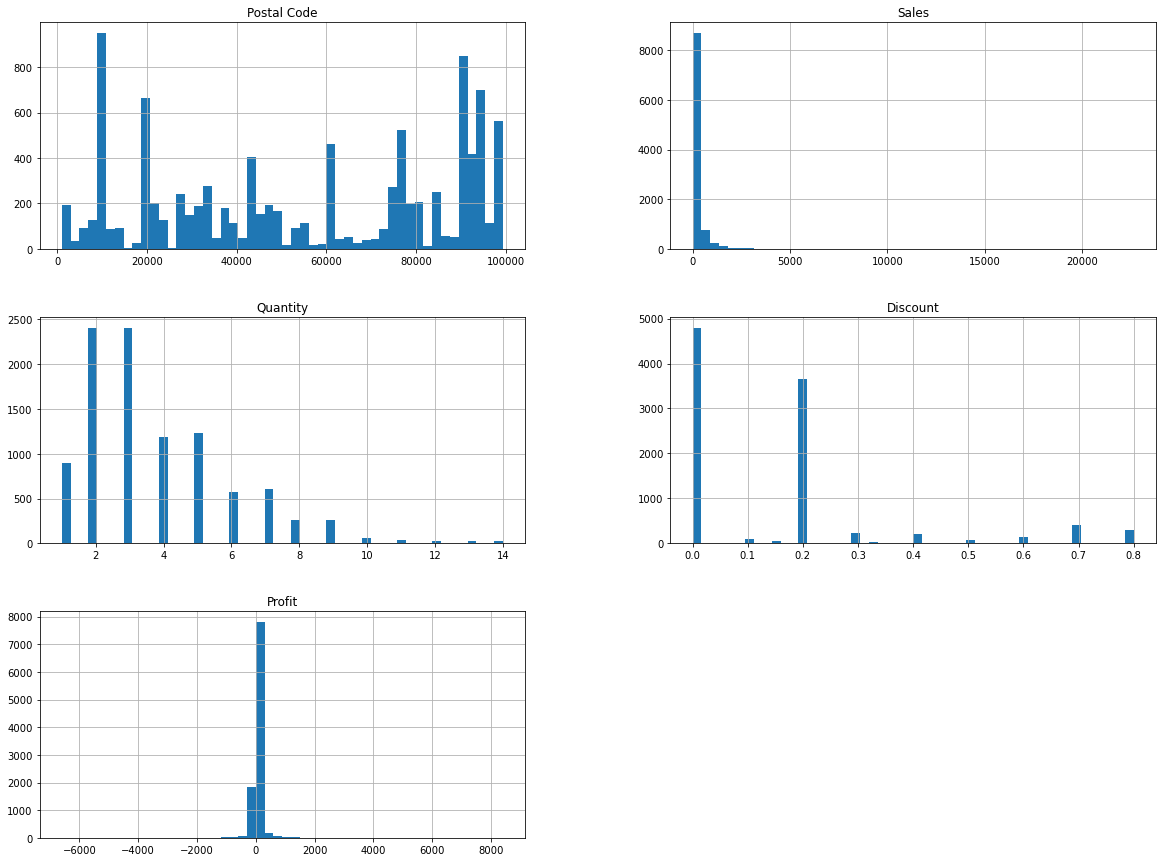

In [67]:
df.hist(bins=50,figsize=(20,15))

# Result

the weak areas where you can work to make more profit:
    
    1.You can increase Quantity to make more profit.
    
    2.Ship Mode: Profit is high for 'first class' but value counts of first class is low,can be increasedto get more profit.
        
    3.Segment: Profit is good in 'Home Office',but value_counts is low,
        so, increase value counts to gain more profit.
    
    4.Category: Increase supply of 'techology' to get more Profit.
        
    5.Sub-Category: Increase supply of 'copier' as it shows more Profit.
        
    6.State: Vermont show high Profit,but deal is less there, deal can be increased to get more profit.
        
Other Conclusions:
    
    * Profit is positively Correlated with "Sales"
    
    * profit is Negatively Correlated with "Discount"
    
    * Profit have Weak Correlation with "Quantity" and "Postal Code"
    
    * 3 States with high Deals: 
        
        1.California
        
        2.Newyork
        
        3.Texas
    * 3 City with high deals:
        
        1.NewYork
        
        2.LosAngeles
        
        3.Philadelphia
        
    * State(Ohio) shows lowest Profit
    
    * Region: Profit is high in West